## Create Wordcloud

Import important modules and variables

In [20]:
import os
import matplotlib.pyplot as plt
import wordcloud
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import sys
import string
import json
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


p = string.punctuation
d = string.digits

Lemmetization and stemming

In [21]:
from nltk.stem.lancaster import LancasterStemmer
ls = LancasterStemmer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.stem.snowball import SnowballStemmer
ss = SnowballStemmer("english") 

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

Method to clean text

In [22]:
def clean_text(unclean_text):
    'Takes string as input and returns it without numbers or punctuation'
    table_p = str.maketrans(p, len(p) * " ")
    table_d = str.maketrans(d, len(d) * " ")
    text_without_punctuation = unclean_text.translate(table_p)
    text_without_punctuation_numbers = text_without_punctuation.translate(table_d)
    return text_without_punctuation_numbers

Lets generate the word cloud

In [23]:
currency = input('input currency (ethereum/bitcoin)')

input currency (ethereum/bitcoin)ethereum


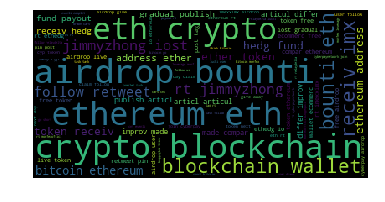

In [26]:
stopwords = nltk.corpus.stopwords.words('english')
with open(os.path.join('downloaded_tweets/tweet_stream_{}_10000.json'.format(currency)), 'r') as file:
    tweets = json.load(file)

excude_punctuation = set(string.punctuation)
exclude_digits = set(string.digits)
tweet_words_set = [ ]
for tweet in tweets:
    tweet_text = tweet['text']
    clean_tweet = clean_text(tweet_text)
    clean_tweet = re.sub(' +', ' ', clean_tweet)
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(["RT", "https", "might", "co"])
    #print(stopwords)
    tweet_words = word_tokenize(clean_tweet)
    tweet_words_set.extend(tweet_words)
word_list_stem = []
word_list_lemmat = []

for item in tweet_words_set:
    word_list_stem.append(ps.stem(item.lower()))
for item in word_list_stem:
    word_list_lemmat.append(wnl.lemmatize(item.lower()))

text2 = ''
for word in word_list_lemmat:
    if len(word) == 1 or word in stopwords:
        continue
    text2 += ' {}'.format(word)
wordcloud2 = WordCloud(max_font_size=40).generate(text2)
plt.figure()
plt.imshow(wordcloud2)
plt.axis('off')
plt.savefig('{} wordcloud.pdf'.format(currency))
plt.show()